# Exercise set 2

## Declaration of generative AI use
please note that I have used generative AI to do formatting for markdown cells and commenting on my code. 
I have not used generative ai for the creation of any of my code or text.

In [81]:
### Import statements 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage as linkage_function, cut_tree
import warnings
warnings.filterwarnings('ignore')

## Problem 17

### Problem 17 Task a

1. For what kinds of tasks can we use the K-means algorithm?
    - The K-means algorithm is used for clustering data into k sets in an unsupervised way. This means that we can use this algorithm for tasks that require identifying natural groupings in datasets which do not have a predetermined response variable.
    - Some examples of specific applications include market segmentation, data compression, and pattern recognition.
    
2. What are the algorithm’s inputs and outputs?
    - The input of the algorithm:
    1. is a dataset with n observations of data
    2. K, the number of clusters you want
    - The output of the algorithm:
    1. The dataset partitioned into k clusters.
    2. The centroid of each cluster.
    
3. How should you interpret the results?
    - There are a few ways you can interpret the results. The clusters themselves identify the natural groupings in the dataset. Whereas the cluster centroids show the degree to which the data in the clusters share attributes.
    - To further interpret the results, you should evaluate the characteristics of the clusters, such as their size, common features, attributes, and dimensions.

### Problem 17 Task B: 

1. **Objective Function in K-Means Algorithm**:
   
    The K-means algorithm aims to minimize the "within-cluster variation," also known as the "within-cluster sum of squares." The cost function $W(C_k)$ for K-means is defined as:

    $$
    W(C_k) = \sum_{i \in C_k} \sum_{j=1}^{p} (x_{ij} - \bar{x}_{kj})^2
    $$

    Where:

    - $W(C_k)$ represents the within-cluster sum of squares for cluster $C_k$
    - $x_{ij}$ represents the value of the $j$-th variable for the $i$-th observation
    - $\bar{x}_{kj}$ is the mean of the $j$-th variable for all observations in cluster $C_k$
    - $p$ is the number of variables.

2. **Behavior of the Objective Function During Iterations**:
   
    As the algorithm iterates, the value of the objective function generally decreases. This decrease is not consistent in every iteration but rather shows a downward trend.

### Problem 17 task c: 

![problem 17](problem17-it1.jpg)
![problem 17](problem17-it2.jpg)
![problem 17](problem17-it3.jpg)



## Problem 18
### Problem 18a
![problem 18a](problem18a.jpg)

### Problem 18b
![problem 18b](problem-18b.jpg)

#### results comparason 
in the end the final cluster is of course the same, the main difference comes from the cost of the joins and the order in which nodes join clusters. In both methods, the first 3 joins are the same. However in 18a, node 5 joins the 1,2 cluster and then the 6,7 cluster joins the 1,2,5 cluster. Finally, the 3,4 cluster joins the 1,2,5,6,7 cluster. Whereas in 18b, node 5 joins the 3,4 cluster and then the 6,7 cluster joins the 3,4,5 cluster. Finally, the 1,3 cluster joins the 3,4,5,6,7 clusters   

Furthermore, in 18.a, the cost of the join has a low mean and standard deviation between joins where as in 18.b, the cost of the join has a realitivly higher mean and standard deviation. 

## Problem 19

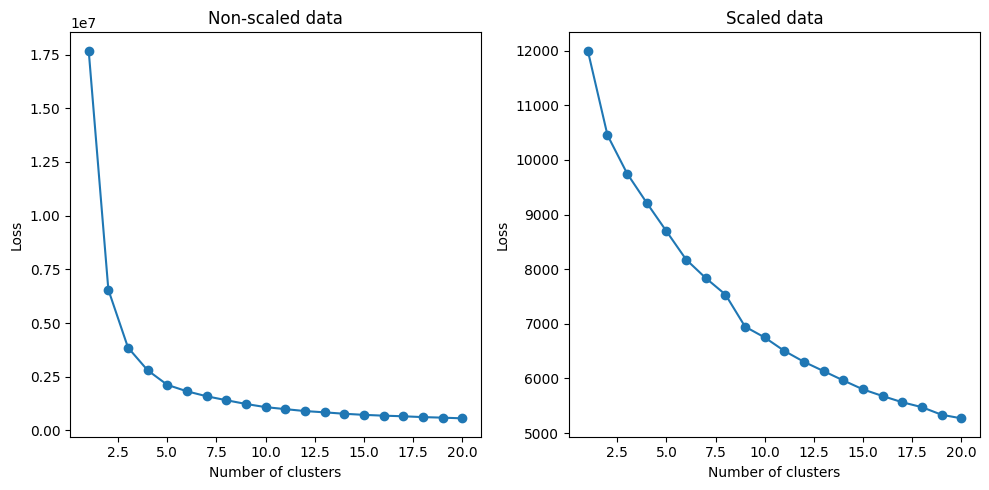

In [52]:
### Problem 19 task a

mol_data = pd.read_csv('data_E3/mol.csv')

mol_data = mol_data.drop(['parentspecies', 'pSat_Pa'], axis=1)
scaler = StandardScaler()
mol_data_scaled = scaler.fit_transform(mol_data)


# non-scaled data
loss_non_scaled = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(mol_data)
    loss_non_scaled.append(kmeans.inertia_)

# scaled data
loss_scaled = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(mol_data_scaled)
    loss_scaled.append(kmeans.inertia_)

# plot side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(range(1, 21), loss_non_scaled, marker='o')
axs[0].set_xlabel('Number of clusters')
axs[0].set_ylabel('Loss')
axs[0].set_title('Non-scaled data')
axs[1].plot(range(1, 21), loss_scaled, marker='o')
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('Loss')
axs[1].set_title('Scaled data')
plt.tight_layout()


### Problem 19a written portion

**Should you scale the columns?**
- In general, it is beneficial to scale the features of the data. This is because K-means clustering uses Euclidean distance to assign data points to clusters. If some features exhibit larger Euclidean distances between data points, they will disproportionately influence the clustering compared to those features with smaller Euclidean distances.

**How does scaling the columns affect the result?**
- Scaling the values of the features ensures that all variables have relatively similar magnitudes of their Euclidean distances. This equalizes the influence of each feature on the clustering process, ensuring that no single feature dominates due to scale differences alone.

Minimum loss:  8639.628894549527
Minimum loss seed:  43
Sufficiently good losses:  48
Initialisations for one reasonably good loss for this data set and number of clusters:  20.833333333333332


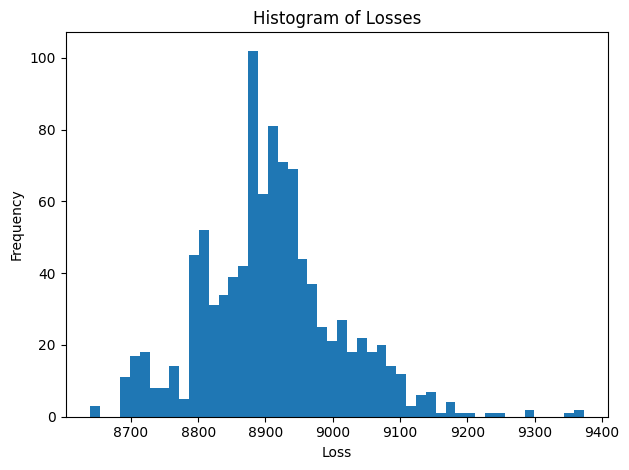

In [124]:
### Problem 19 task b: 

# Set the number of clusters and initializations
k = 5
initialisations = 1000

# List to store the loss values for each initialization
losses = []

# Perform KMeans with different random states to evaluate loss variation
for i in range(initialisations):
    kmeans = KMeans(n_clusters=k, random_state=i, n_init=1, init='random').fit(mol_data_scaled)
    losses.append(kmeans.inertia_)

# Print the minimum loss and the corresponding seed (random state)
print('Minimum loss: ', min(losses))
print('Minimum loss seed: ', losses.index(min(losses)))

# Count initializations that produce a loss within 1% of the minimum loss
sufficiently_good = sum(loss <= 1.01*min(losses) for loss in losses)
print('Sufficiently good losses: ', sufficiently_good)

# Calculate the expected number of initializations needed to get one sufficiently good loss
initialisations_for_good_loss = initialisations / sufficiently_good
print('Initialisations for one reasonably good loss for this data set and number of clusters: ', initialisations_for_good_loss)

# Plot a histogram of losses
plt.figure()
plt.hist(losses, bins=50)
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Losses')
plt.tight_layout()
plt.show()

### Problem 19 task b (writen):

**How do we deal with the effect of initialization when using k-means in practice?**
- To mitigate the influence of the initial cluster center selection in K-means, a common approach is to run the K-means algorithm multiple times, each time with different random initializations. After these runs, the one yielding the lowest final loss is selected. This process increases the likelihood of finding a more optimal and stable clustering solution, reducing the chances of the algorithm converging to a suboptimal local minimum.

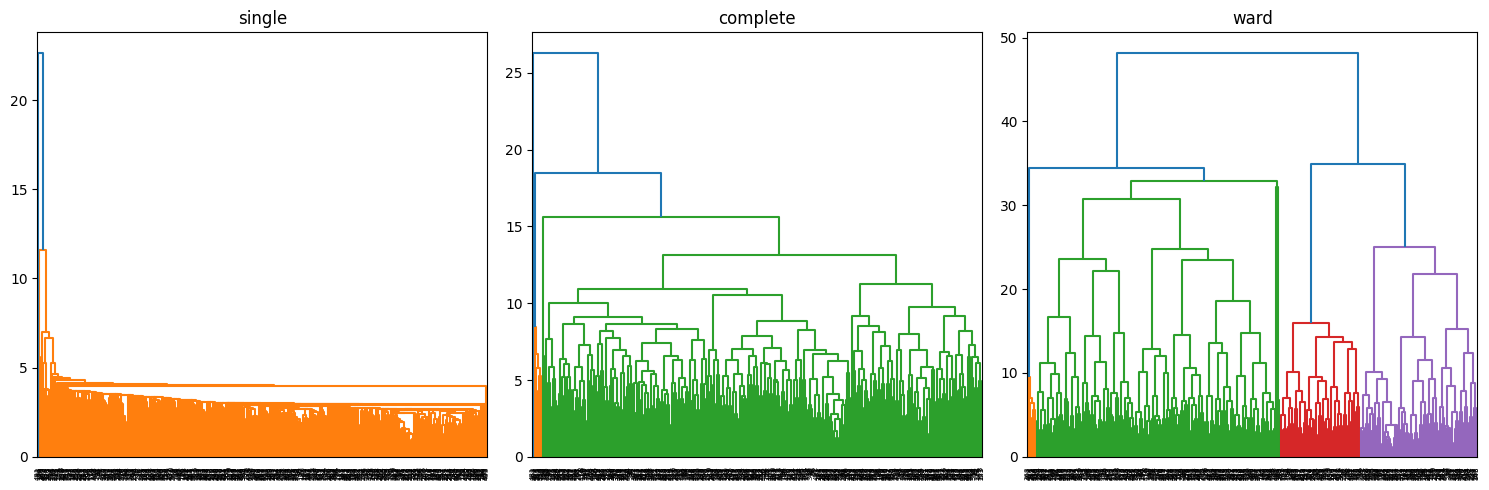

In [121]:
### Problem 19 task c i:

# Define the types of linkage methods to be used
linkage_types = ['single', 'complete', 'ward']
max_linkage_height = 0

# Set up the figure for plotting dendrograms
plt.figure(figsize=(15, 5))

# Loop through each linkage type and plot its dendrogram
for i in range(len(linkage_types)):
    Z = linkage_function(mol_data_scaled, linkage_types[i])
    max_linkage_height = max(max_linkage_height, Z[-1, 2])
    plt.subplot(1, 3, i + 1)
    dendrogram(Z)
    plt.title(linkage_types[i])

plt.tight_layout()
plt.show()

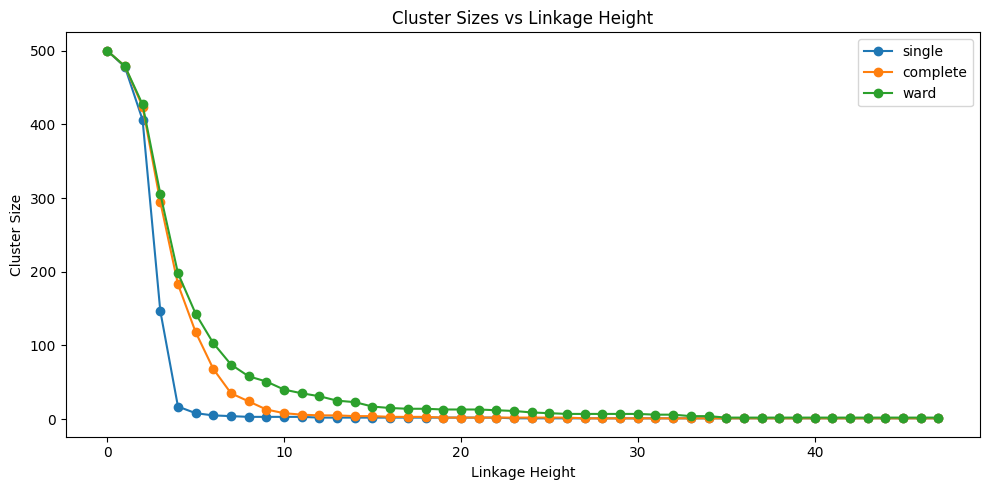

In [120]:
### Problem 19 task c ii
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.xlabel('Linkage Height')
plt.ylabel('Cluster Size')
plt.title('Cluster Sizes vs Linkage Height')

# Define the range of heights for the analysis
heights = range(int(max_linkage_height))

# Loop through different types of linkages
for i, linkage_type in enumerate(linkage_types):
    cluster_sizes = []

    # Compute and store the cluster sizes for each height
    for j in heights:
        flat_clusters = cut_tree(linkage_function(mol_data_scaled, linkage_type), height=j)
        cluster_sizes.append(len(np.unique(flat_clusters)))

    # Plotting the cluster sizes for each linkage type
    plt.plot(heights, cluster_sizes, label=linkage_type, marker='o')

# Display the legend and the plot
plt.legend()
plt.tight_layout()
plt.show()

## Problem 20 


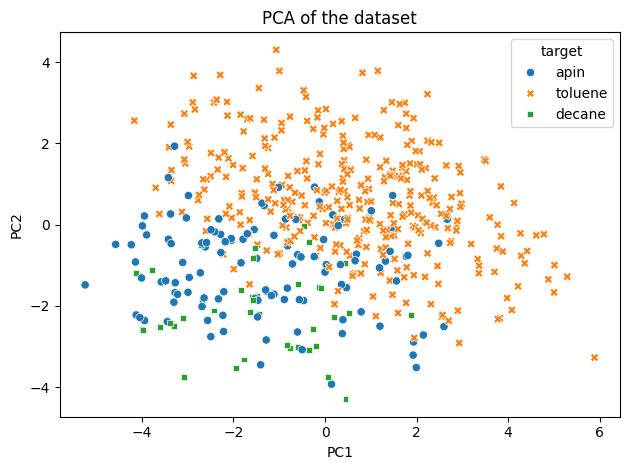

In [119]:
### Problem 20 task a

target = mol_data['parentspecies']  # Extracting the target variable

# Dropping unnecessary columns and scaling the features
features = mol_data.drop(['parentspecies', 'pSat_Pa'], axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying PCA and transforming the features
pca = PCA(n_components=2)
pca.fit(features_scaled)
features_pca = pca.transform(features_scaled)

# Creating a DataFrame for visualization
data = pd.DataFrame(features_pca, columns=['PC1', 'PC2'])
data['target'] = target

# Plotting the PCA results
plt.figure()
sns.scatterplot(data=data, x='PC1', y='PC2', hue='target', legend='full', style='target')
plt.title('PCA of the dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()



### Problem 20 task a (written)
What does the plot imply about the relationship between parentspecies and the other variables?
- The plot suggests a correlation between 'parentspecies' and the other variables in the dataset. 'Toluene' primarily clusters towards the middle and right side of the first principal component (PC1) and to the upper-right side for the second principal component (PC2). Conversely, 'apin' and 'decane' are more dispersed across the left side of PC1 and towards the lower-middle of PC2. This pattern implies that 'toluene' has a distinct multivariate profile compared to 'apin' and 'decane', based on the measured variables. However, there is quite a lot of overlap between the three 'parentspecies' along both principal components, suggesting that the differentiation between the 'parentspecies' may not be entirely distinct across all measured variables. The significant overlap along both PC1 and PC2 indicates that while there are differences, there are also shared characteristics or a degree of similarity in the variables that influence both components.



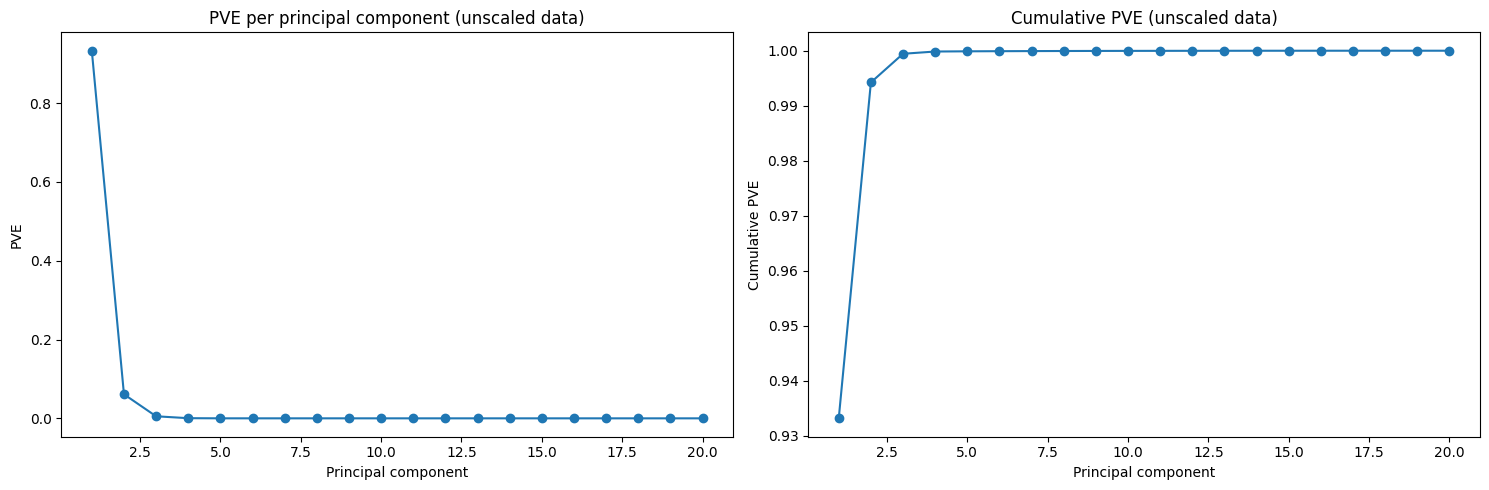

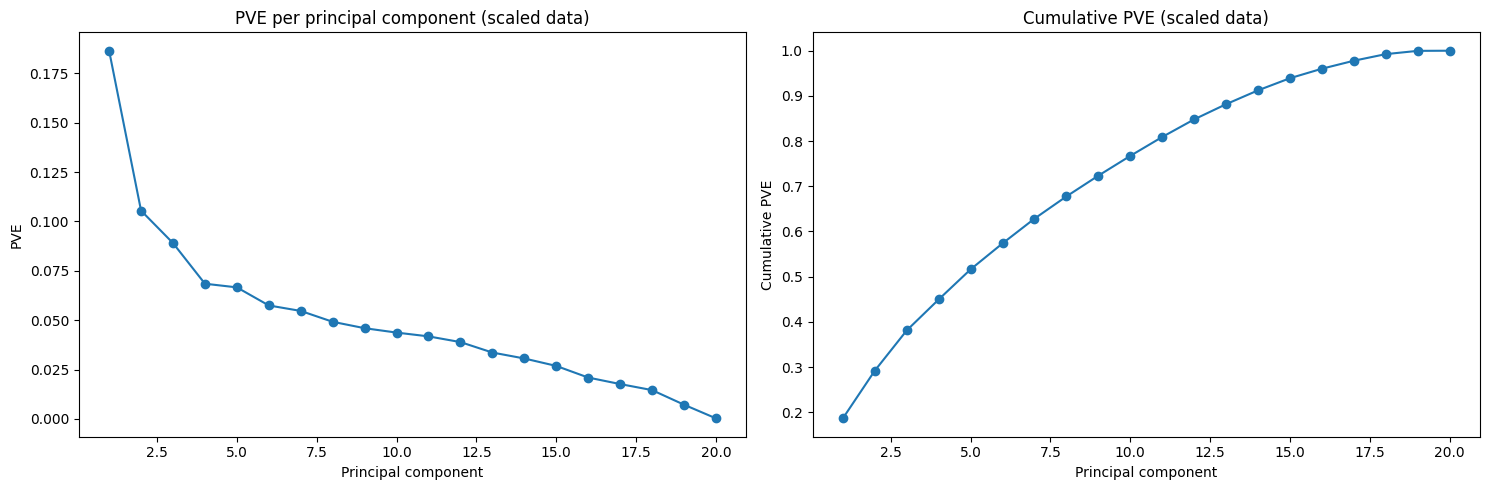

In [75]:
### Problem 20 task b

# Function to perform PCA and plot PVE
def plot_pca(features, scaled=False):
    pca = PCA(n_components=20)
    pca.fit(features)
    pve = pca.explained_variance_ratio_
    cum_pve = np.cumsum(pve)
    
    data_type = 'scaled' if scaled else 'unscaled'
    
    plt.figure(figsize=(15, 5))
    
    # PVE per principal component
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(pve) + 1), pve, marker='o')
    plt.xlabel('Principal component')
    plt.ylabel('PVE')
    plt.title(f'PVE per principal component ({data_type} data)')
    
    # Cumulative PVE
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(pve) + 1), cum_pve, marker='o')
    plt.xlabel('Principal component')
    plt.ylabel('Cumulative PVE')
    plt.title(f'Cumulative PVE ({data_type} data)')
    
    plt.tight_layout()
    plt.show()

# Plot PVE for unscaled and scaled data
plot_pca(features) 
plot_pca(features_scaled, scaled=True) 


### Problem 20 task b (written)

Why does it seem that fewer components explain a large proportion of the variance for unscaled data compared to the scaled data?
- When performing PCA, the amount of variance that each principal component explains depends on the scale of the variables involved. for the unscaled data, if there are features with large variances, they will dominate the first few principal components. As a result, fewer components explain a large proportion of the variancence. Scaled data, which gives all features the same importance, dosnt have this feature which leads to a more balanced distribution of explained variance across the components.

In [104]:
### Problem 20 task c i

# import Ols


import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Read the training data
training_data = pd.read_csv('data_E3/mol_train.csv')
features = training_data.drop(['parentspecies', 'pSat_Pa'], axis=1)
response = np.log10(training_data['pSat_Pa'])

# Read the validation data
validation_data = pd.read_csv('data_E3/mol_validation.csv')
validation_features = validation_data.drop(['parentspecies', 'pSat_Pa'], axis=1)
validation_response = np.log10(validation_data['pSat_Pa'])

# Use ordinary least-squares linear regression to predict log10(pSat_Pa)
ols = LinearRegression()
ols.fit(features, response)
ols_predictions = ols.predict(validation_features)
ols_mse = mean_squared_error(validation_response, ols_predictions)

print('RMSE for OLS: ', np.sqrt(ols_mse))



RMSE for OLS:  1.176002833162104


        RMSE
0   2.152544
1   1.911308
2   1.975538
3   1.896765
4   1.866448
5   1.594612
6   1.574658
7   1.502938
8   1.489811
9   1.468918
10  1.246523
11  1.172490
12  1.171038
13  1.173811
14  1.195663
15  1.195949
16  1.196815
17  1.175874
18  1.164423
19  1.163238
20  1.163981
21  1.176003
22  1.176003
23  1.176003
24  1.176003



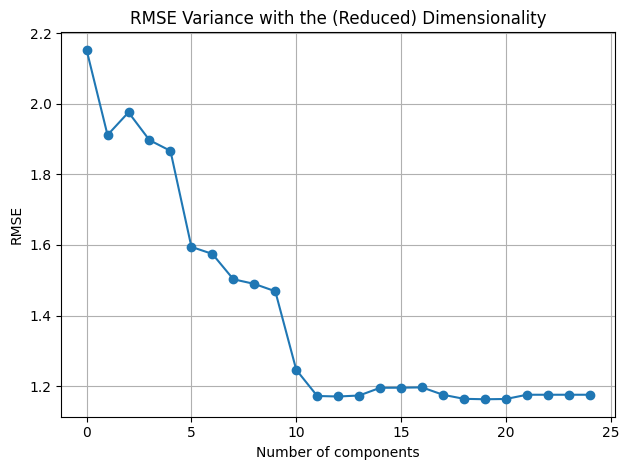

Minimum RMSE:  1.16323763517776
Optimal number of components:  19


In [113]:
# Create a DataFrame to store RMSE values for different numbers of components
outtable = pd.DataFrame({'RMSE': np.nan}, index=range(0, 25))

# Fit OLS model with only intercept (0 components) and calculate RMSE
ols = LinearRegression()
ols.fit(np.ones((features.shape[0], 1)), response)
ols_predictions = ols.predict(np.ones((validation_features.shape[0], 1)))
ols_mse = mean_squared_error(validation_response, ols_predictions)
outtable.loc[0, 'RMSE'] = np.sqrt(ols_mse)

# Evaluate OLS model performance with increasing number of PCA components
for n in range(1, 25): 
    pca = PCA(n_components=n)
    pca.fit(features)
    pca_features = pca.transform(features)
    pca_validation_features = pca.transform(validation_features)
    
    ols = LinearRegression()
    ols.fit(pca_features, response)
    ols_predictions = ols.predict(pca_validation_features)
    ols_mse = mean_squared_error(validation_response, ols_predictions)
    
    outtable.loc[n, 'RMSE'] = np.sqrt(ols_mse)

# Print the RMSE table
print(outtable)
print()

# Plot the RMSE against the number of PCA components
plt.figure()
plt.plot(outtable.index, outtable['RMSE'], marker='o')
plt.xlabel('Number of components')
plt.ylabel('RMSE')
plt.title('RMSE Variance with the (Reduced) Dimensionality')
plt.tight_layout()
plt.show()

# Output the minimum RMSE and the corresponding number of components
print('Minimum RMSE: ', outtable['RMSE'].min())
print('Optimal number of components: ', outtable['RMSE'].idxmin())


In [118]:
### Problem 20 task c iii

# Find the smallest dimensionality where validation set RMSE is at most 1% larger than the minimum RMSE
min_rmse = outtable['RMSE'].min()
threshold_rmse = 1.01 * min_rmse
optimal_dimensionality = outtable[outtable['RMSE'] <= threshold_rmse].index[0]

# Print the result
print('Smallest dimensionality that gives a validation set RMSE at most 1% larger than the minimum RMSE:',
       optimal_dimensionality)

Smallest dimensionality that gives a validation set RMSE at most 1% larger than the minimum RMSE: 11


### Problem 20 task c iii (written)
Argue why this dimensionality could be a better choice to learn a model than the “optimal” dimensionality you found in subtask (ii) above.
-  The "optimal" dimensionality, yielding the lowest RMSE on the validation set, might be overfitting the model to the training data. By allowing a slight increase in RMSE, you reduce the risk of overfitting, potentially leading to a model that generalizes better to unseen data.

# Problem 21
### Problem 21 Task a
What did I learn? 
- This week, I learned about the unsupervised learning techniques: PCA (Principal Component Analysis), K-means clustering, and Hierarchical clustering.

What did I not understand? 
- I think I understood everything this week, primarily because there were fewer topics, allowing me more time to delve into each one. Having fewer topics was particularly beneficial for thoroughly digesting the material, even while I was working on the Kaggle competition.

Was there something relevant to other studies or (future) work?
- I think the all the topics are relevant to my studies and future work. Clustering is useful for understanding datasets of almost all types, and Principal Component Analysis is especially valuable in building machine learning models.

Feedback
- One piece of feedback would be to encourage students to complete this homework before participating in the Kaggle competition. Specifically, PCA was instrumental in achieving a top R-squared value in the competition. However, I didn't feel very confident in the topic until I had reread the matrials for the homework and done question 20.

### Problem 21 Task b

Time spent: 
- I spent about 18 hours on this homework, excluding time for reading and lectures.